Import the Q# module.

This enables the `%%qsharp` magic and initializes a Q# interpreter singleton.

In [1]:
import qsharp


ModuleNotFoundError: No module named 'qsharp'

Run Q# using the `%%qsharp` magic.

`DumpMachine()` and `Message()` output get formatted as HTML. Return value is shown as cell output.

In [2]:
%%qsharp

operation Main() : Result {
    use q = Qubit();
    X(q);
    Microsoft.Quantum.Diagnostics.DumpMachine();
    let r = M(q);
    Message($"The result of the measurement is {r}");
    Reset(q);
    r
}

Main()


STATE:
|1‚ü©: 1.0000+0.0000ùëñ

The result of the measurement is One

One

`qsharp.eval()` does the same thing as the `%%qsharp` magic.

`DumpMachine()` and `Message()` print to stdout and get displayed in the notebook as plain text

In [3]:
qsharp.eval("Main()")


STATE:
|1‚ü©: 1.0000+0.0000ùëñ
The result of the measurement is One


One

Assign a result to a Python variable.

In [4]:
result = qsharp.eval("1 + 2")

print(f"Result: {result} (type: {type(result).__name__})")


Result: 3 (type: int)


Errors are exceptions. 

Catch and handle compilation errors.

In [5]:
from qsharp import QSharpError

try:
    qsharp.eval(
        """
operation Foo() : Unit {
    Bar();
    Baz();
}
"""
    )
except QSharpError as ex:
    print(ex)


Qsc.Resolve.NotFound

  √ó name error
  ‚ï∞‚îÄ‚ñ∂ `Bar` not found
   ‚ï≠‚îÄ[line_3:2:1]
 2 ‚îÇ operation Foo() : Unit {
 3 ‚îÇ     Bar();
   ¬∑     ‚îÄ‚îÄ‚îÄ
 4 ‚îÇ     Baz();
   ‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ
Qsc.Resolve.NotFound

  √ó name error
  ‚ï∞‚îÄ‚ñ∂ `Baz` not found
   ‚ï≠‚îÄ[line_3:3:1]
 3 ‚îÇ     Bar();
 4 ‚îÇ     Baz();
   ¬∑     ‚îÄ‚îÄ‚îÄ
 5 ‚îÇ }
   ‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ
Qsc.TypeCk.AmbiguousTy

  √ó type error
  ‚ï∞‚îÄ‚ñ∂ insufficient type information to infer type
   ‚ï≠‚îÄ[line_3:2:1]
 2 ‚îÇ operation Foo() : Unit {
 3 ‚îÇ     Bar();
   ¬∑     ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
 4 ‚îÇ     Baz();
   ‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ
  help: provide a type annotation
Qsc.TypeCk.AmbiguousTy

  √ó type error
  ‚ï∞‚îÄ‚ñ∂ insufficient type information to infer type
   ‚ï≠‚îÄ[line_3:3:1]
 3 ‚îÇ     Bar();
 4 ‚îÇ     Baz();
   ¬∑     ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
 5 ‚îÇ }
   ‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ
  help: provide a type annotation



Catch and handle runtime errors.

In [6]:
try:
    qsharp.eval("operation Foo() : Unit { use q = Qubit(); X(q) } Foo()")
except QSharpError as ex:
    print(ex)


Error: Qubit0 released while not in |0‚ü© state
Call stack:
    at QIR.Runtime.__quantum__rt__qubit_release in core/qir.qs
    at Foo in line_4
Qsc.Eval.ReleasedQubitNotZero

  √ó runtime error
  ‚ï∞‚îÄ‚ñ∂ Qubit0 released while not in |0‚ü© state
   ‚ï≠‚îÄ[line_4:1:1]
 1 ‚îÇ operation Foo() : Unit { use q = Qubit(); X(q) } Foo()
   ¬∑                          ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   ¬∑                                  ‚ï∞‚îÄ‚îÄ Qubit0
   ‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ
  help: qubits should be returned to the |0‚ü© state before being released to
        satisfy the assumption that allocated qubits start in the |0‚ü© state



A runtime error that's not caught gets reported as a Python exception.

In [7]:
qsharp.eval("operation Foo() : Unit { use q = Qubit(); X(q) } Foo()")


QSharpError: Error: Qubit1 released while not in |0‚ü© state
Call stack:
    at QIR.Runtime.__quantum__rt__qubit_release in core/qir.qs
    at Foo in line_5
[31mQsc.Eval.ReleasedQubitNotZero[0m

  [31m√ó[0m runtime error
[31m  ‚ï∞‚îÄ‚ñ∂ [0mQubit1 released while not in |0‚ü© state
   ‚ï≠‚îÄ[[36;1;4mline_5[0m:1:1]
 [2m1[0m ‚îÇ operation Foo() : Unit { use q = Qubit(); X(q) } Foo()
   ¬∑ [35;1m                         ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ[0m
   ¬∑                                  [35;1m‚ï∞‚îÄ‚îÄ [35;1mQubit1[0m[0m
   ‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ
[36m  help: [0mqubits should be returned to the |0‚ü© state before being released to
        satisfy the assumption that allocated qubits start in the |0‚ü© state


In `%%qsharp` cells, exceptions are handled and displayed as error text.

In [8]:
%%qsharp

operation Bar() : Unit {
    use q = Qubit();
    Microsoft.Quantum.Diagnostics.DumpMachine();
    X(q);
}

Bar()


STATE:
|110‚ü©: 1.0000+0.0000ùëñ

QSharpCellError: Error: Qubit2 released while not in |0‚ü© state
Call stack:
    at QIR.Runtime.__quantum__rt__qubit_release in core/qir.qs
    at Bar in line_6
[31mQsc.Eval.ReleasedQubitNotZero[0m

  [31m√ó[0m runtime error
[31m  ‚ï∞‚îÄ‚ñ∂ [0mQubit2 released while not in |0‚ü© state
   ‚ï≠‚îÄ[[36;1;4mline_6[0m:2:1]
 [2m2[0m ‚îÇ operation Bar() : Unit {
 [2m3[0m ‚îÇ     use q = Qubit();
   ¬∑ [35;1m    ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ[0m
   ¬∑             [35;1m‚ï∞‚îÄ‚îÄ [35;1mQubit2[0m[0m
 [2m4[0m ‚îÇ     Microsoft.Quantum.Diagnostics.DumpMachine();
   ‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ
[36m  help: [0mqubits should be returned to the |0‚ü© state before being released to
        satisfy the assumption that allocated qubits start in the |0‚ü© state


Streaming output for long running operations.

In [9]:
%%qsharp

open Microsoft.Quantum.Diagnostics;

operation Main() : Unit {
    Message("Generating random bit... ");
    for i in 0..400000 {
        use q = Qubit();
        H(q);
        let r = M(q);
        if (i % 100000) == 0 {
            DumpMachine();
            Message($"Result: {r}");
        }
        Reset(q);
    }
}

Main()


Generating random bit...

STATE:
|1111‚ü©: 1.0000+0.0000ùëñ

Result: One

STATE:
|1111‚ü©: 1.0000+0.0000ùëñ

Result: One

STATE:
|1111‚ü©: 1.0000+0.0000ùëñ

Result: One

STATE:
|1111‚ü©: 1.0000+0.0000ùëñ

Result: One

STATE:
|1111‚ü©: 1.0000+0.0000ùëñ

Result: One

Running multiple shots for an expression. Each shot uses an independent instance of the simulator. A list of results (or runtime errors) is returned.

In [10]:
%%qsharp

operation RandomBit() : Result {
    use q = Qubit();
    H(q);
    let res = M(q);
    Reset(q);
    return res;
}


In [11]:
results = qsharp.run("RandomBit()", 10)

results


[One, Zero, Zero, Zero, Zero, Zero, Zero, One, Zero, Zero]

The results can then be processed, e.g. plotted in a histogram using popular Python libraries.

In [ ]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


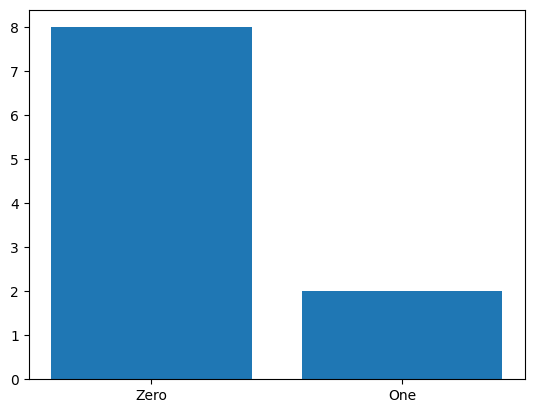

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Sort the results so that the histogram labels appear in the correct order
results.sort()
# Count the number of times each result appears
counts = Counter(results)

(values, counts) = counts.keys(), counts.values()
xlabels = np.arange(len(counts))
plt.bar(xlabels, counts)
plt.xticks(xlabels, values)
plt.show()


In [ ]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


<Axes: >

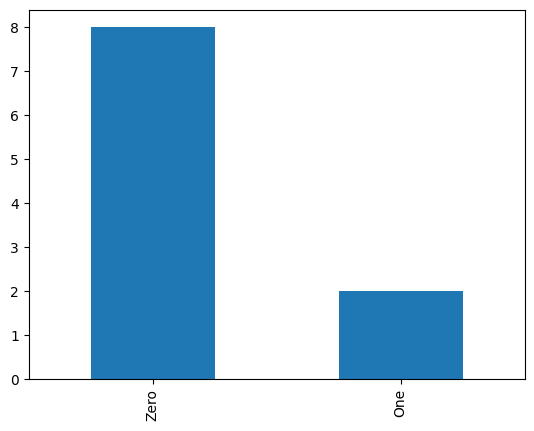

In [13]:
import pandas
from collections import Counter

# Sort the results so that the histogram labels appear in the correct order
results.sort()
pandas.Series(results).value_counts(sort=False).plot(kind='bar')


A compiler error in the entry expression:

In [14]:
qsharp.run("""RandomBit("a")""", 10)


QSharpError: [31mQsc.TypeCk.TyMismatch[0m

  [31m√ó[0m type error
[31m  ‚ï∞‚îÄ‚ñ∂ [0mexpected Unit, found String
   ‚ï≠‚îÄ[[36;1;4m<entry>[0m:1:1]
 [2m1[0m ‚îÇ RandomBit("a")
   ¬∑ [35;1m‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ[0m
   ‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ


Some shots throw runtime errors:

In [15]:
%%qsharp

operation Bad() : Unit {
    use q = Qubit();
    H(q);
    let res = M(q);
    if (res == One) {
        // Do something bad, sometimes
        use q2 = Qubit();
        X(q2);
    }
}


In [16]:
qsharp.run("Bad()", 10)


QSharpError: Error: Qubit1 released while not in |0‚ü© state
Call stack:
    at QIR.Runtime.__quantum__rt__qubit_release in core/qir.qs
    at Bad in line_9
[31mQsc.Eval.ReleasedQubitNotZero[0m

  [31m√ó[0m runtime error
[31m  ‚ï∞‚îÄ‚ñ∂ [0mQubit1 released while not in |0‚ü© state
   ‚ï≠‚îÄ[[36;1;4mline_9[0m:7:1]
 [2m7[0m ‚îÇ         // Do something bad, sometimes
 [2m8[0m ‚îÇ         use q2 = Qubit();
   ¬∑ [35;1m        ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ[0m
   ¬∑                 [35;1m‚ï∞‚îÄ‚îÄ [35;1mQubit1[0m[0m
 [2m9[0m ‚îÇ         X(q2);
   ‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ
[36m  help: [0mqubits should be returned to the |0‚ü© state before being released to
        satisfy the assumption that allocated qubits start in the |0‚ü© state
